### Gaussian Process

[Gaussian Processes](https://en.wikipedia.org/wiki/Gaussian_process) (GPs) is a non-parametric method that infers a distribution over functions directly, not via the parameters of a parametric function. As a [random process](https://en.wikipedia.org/wiki/Stochastic_process), a Gaussian process defines a prior over functions where any point $\mathbf{x} \in \mathbb{R}^d$ is assigned a random variable $f(\mathbf{x})$ such that the joint distribution of a finite number of these variables $p(f(\mathbf{x}_1),...,f(\mathbf{x}_N))$ is itself Gaussian:
$$p(\mathbf{f} \mid \mathbf{X}) = \mathcal{N}(\mathbf{f}; \boldsymbol\mu, \mathbf{K}), \quad \mathbf{f} = (f(\mathbf{x}_1),...,f(\mathbf{x}_N)), \quad \boldsymbol\mu = (m(\mathbf{x}_1),...,m(\mathbf{x}_N)), \quad \mathbf{K}_{ij} = \kappa(\mathbf{x}_i,\mathbf{x}_j).$$
Here, $m$ is the mean function and $\kappa$ is a positive definite *kernel function* or *covariance function*. Thus, a Gaussian process is a distribution over functions whose shape (smoothness, ...) is defined by $\mathbf{K} = \kappa(\mathbf{X}, \mathbf{X})$. If points $\mathbf{x}_i$ and $\mathbf{x}_j$ are considered to be similar by the kernel the function values at these points, $f(\mathbf{x}_i)$ and $f(\mathbf{x}_j)$, can be expected to be similar too.

A GP prior $p(\mathbf{f} \mid \mathbf{X})$ can be converted into a GP posterior $p(\mathbf{f} \mid \mathbf{X},\mathbf{y})$ after having observed some data $\mathbf{y}$. If we assume the observed data has a Gaussian noise with variance $\sigma_y^2$, i.e. $p(\mathbf{y} \mid \mathbf{X}, \mathbf{f}) = \mathcal{N}(\mathbf{y}; \mathbf{f}, \sigma_y^2 \mathbf{I})$, then the marginal likelihood $p(\mathbf{y} \mid \mathbf{X}) = \int p(\mathbf{y} \mid \mathbf{X}, \mathbf{f}) \, p(\mathbf{f} \mid \mathbf{X}) \, d\mathbf{f} = \mathcal{N}(\mathbf{y} ; \boldsymbol{\mu}, \mathbf{K}_y)$ is a Gaussian with covariance matrix $\mathbf{K}_y = \mathbf{K} + \sigma_y^2\mathbf{I}$, and so is the posterior distribution $p(\mathbf{f} \mid \mathbf{X},\mathbf{y})$:
$$ p(\mathbf{f} \mid \mathbf{X},\mathbf{y}) = \frac {p(\mathbf{y} \mid \mathbf{X},\mathbf{f}) \; p(\mathbf{f} \mid \mathbf{X})}{p(\mathbf{y} \mid \mathbf{X})} = \mathcal{N}(\mathbf{f}; \boldsymbol{\mu} + \mathbf{K} \mathbf{K}_y^{-1} (\mathbf{y} - \boldsymbol{\mu}), \mathbf{K} - \mathbf{K}  \mathbf{K}_y^{-1} \mathbf{K}).$$

The predictive distribution $p(\mathbf{f}_* \mid \mathbf{X}_*,\mathbf{X},\mathbf{y})$ can be derived by marginalizing out the function values $\mathbf{f}$ from the posterior distribution $p(\mathbf{f} \mid \mathbf{X},\mathbf{y})$ and utilizing the fact that the conditional distribution $p(\mathbf{f}_* \mid \mathbf{X}, \mathbf{X}_*, \mathbf{f})$ is also Gaussian, which can be derived from the joint Gaussian distribution of $\mathbf{f}$ and $\mathbf{f}_*$, i.e. $p(\mathbf{f}_* \mid \mathbf{X}_*,\mathbf{X},\mathbf{y}) = \int p(\mathbf{f}_* \mid \mathbf{X}, \mathbf{X}_*, \mathbf{f}) \, p(\mathbf{f} \mid \mathbf{X},\mathbf{y}) d\mathbf{f}$. However, it is perhaps easier to observe that the joint Gaussian distribution of $\mathbf{y}$ and $\mathbf{f}_*$ is itself Gaussian:
$$\begin{bmatrix}\mathbf{y} \\ \mathbf{f}_*\end{bmatrix} \sim \mathcal{N} \left(\begin{bmatrix}\boldsymbol{\mu} \\ \boldsymbol{\mu}_* \end{bmatrix}, \begin{bmatrix}\mathbf{K}_y & \mathbf{K}_* \\ \mathbf{K}_*^T & \mathbf{K}_{**}\end{bmatrix} \right) = \mathcal{N} \left(\begin{bmatrix}\boldsymbol{\mu} \\ \boldsymbol{\mu}_* \end{bmatrix}, \begin{bmatrix}\kappa(\mathbf{X},\mathbf{X}) + \sigma_y^2\mathbf{I} & \kappa(\mathbf{X},\mathbf{X}_*) \\ \kappa(\mathbf{X}_*,\mathbf{X}) & \kappa(\mathbf{X}_*,\mathbf{X}_*)\end{bmatrix}\right).$$
By the standard rules for conditioning Gaussians, the predictive distribution has the form
$$
p(\mathbf{f}_* \mid \mathbf{X}_*,\mathbf{X},\mathbf{y}) = \mathcal{N}(\mathbf{f}_* \mid \boldsymbol{\mu}_*, \boldsymbol{\Sigma}_*), \quad  \boldsymbol{\mu}_* =  \boldsymbol{\mu} + \mathbf{K}_*^T \mathbf{K}_y^{-1} (\mathbf{y} - \boldsymbol{\mu}), \quad \boldsymbol{\Sigma_*} = \mathbf{K}_{**} - \mathbf{K}_*^T \mathbf{K}_y^{-1} \mathbf{K}_*.
$$
Note that we can also read off the posterior distribution $p(\mathbf{f} \mid \mathbf{X},\mathbf{y})$ from the predictive distribution by letting $\mathbf{f}_* = \mathbf{f}$.

### NumPy Implementation

Here, we will use the squared exponential kernel, also known as Gaussian kernel or RBF kernel, with the length parameter $l$ controlling the smoothness of the function and the scale parameter $\sigma_f$ controlling the vertical variation.

$$\kappa(\mathbf{x}_i,\mathbf{x}_j) = \sigma_f^2 \exp\left(-\frac{1}{2l^2}\left(\mathbf{x}_i - \mathbf{x}_j)^T
  (\mathbf{x}_i - \mathbf{x}_j\right)\right).$$ 
  
We define a prior over functions with mean zero and a covariance matrix computed with kernel parameters $l=1$ and $\sigma_f=1$. To draw random functions from that GP we draw random samples from the corresponding multivariate normal. The following example draws three random samples and plots it together with the zero mean and the 95% confidence interval (computed from the diagonal of the covariance matrix).

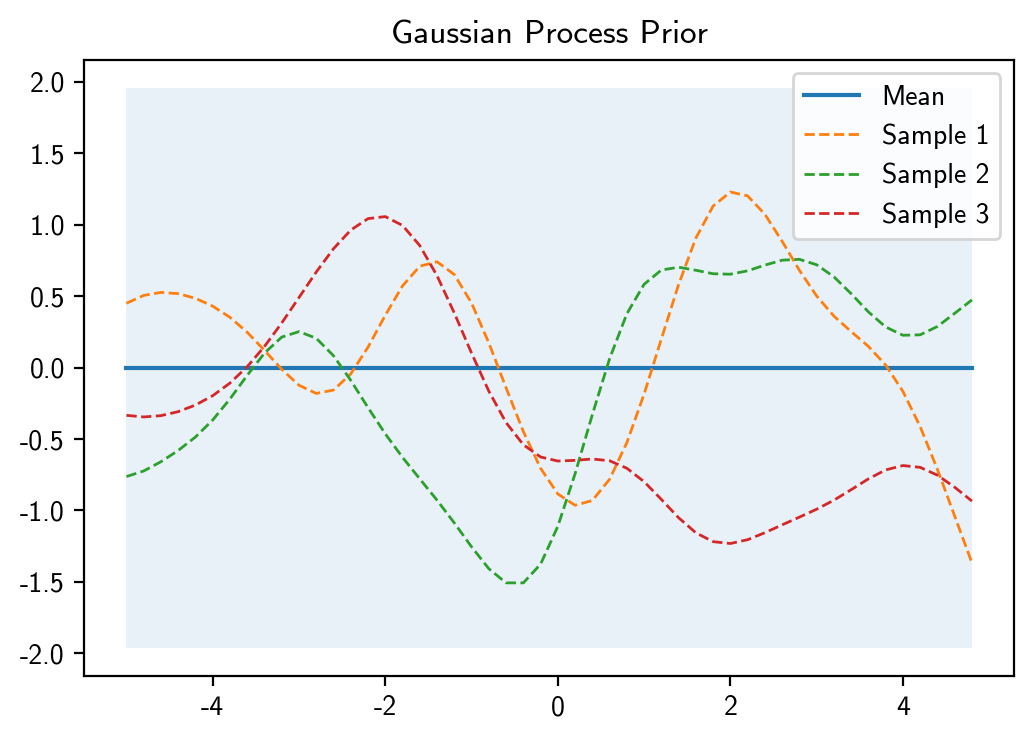

In [94]:
import numpy as np
import matplotlib.pyplot as plt


def kernel(X1, X2, l=1.0, sigma_f=1.0):
    """Return a covariance matrix of size m x n given two inputs of size m x d and n x d"""
    dist = np.sum(X1 * X1, axis=1, keepdims=True) + np.sum(X2 * X2, axis=1) - 2 * X1 @ X2.T
    return sigma_f ** 2 * np.exp(-0.5 / l ** 2 * dist)


def plot_gp(X, mu, cov, samples=[], X_train=None, Y_train=None, title=None, ax=None):
    ax = plt.subplots(figsize=(6, 4))[1] if ax is None else ax
    ax.plot(X, mu, label="Mean")
    ax.fill_between(X.ravel(), mu.ravel() - 1.96 * np.sqrt(np.diag(cov)), mu.ravel() + 1.96 * np.sqrt(np.diag(cov)), alpha=0.1)

    for i, sample in enumerate(samples):
        ax.plot(X, sample, lw=1, ls="--", label=f"Sample {i+1}")
    ax.plot(X_train, Y_train, "r.") if X_train is not None else None
    ax.set_title(title) if title is not None else None
    ax.legend()


# Define a GP at a finite set of points as a multivariate normal
X = np.arange(-5, 5, 0.2).reshape(-1, 1)
mu = np.zeros(X.shape)
cov = kernel(X, X)

# Sample from the GP by drawing samples from the multivariate normal
samples = np.random.multivariate_normal(mu.ravel(), cov, size=3)

# Plot the realizations of the GP
plot_gp(X, mu, cov, samples, title="Gaussian Process Prior")

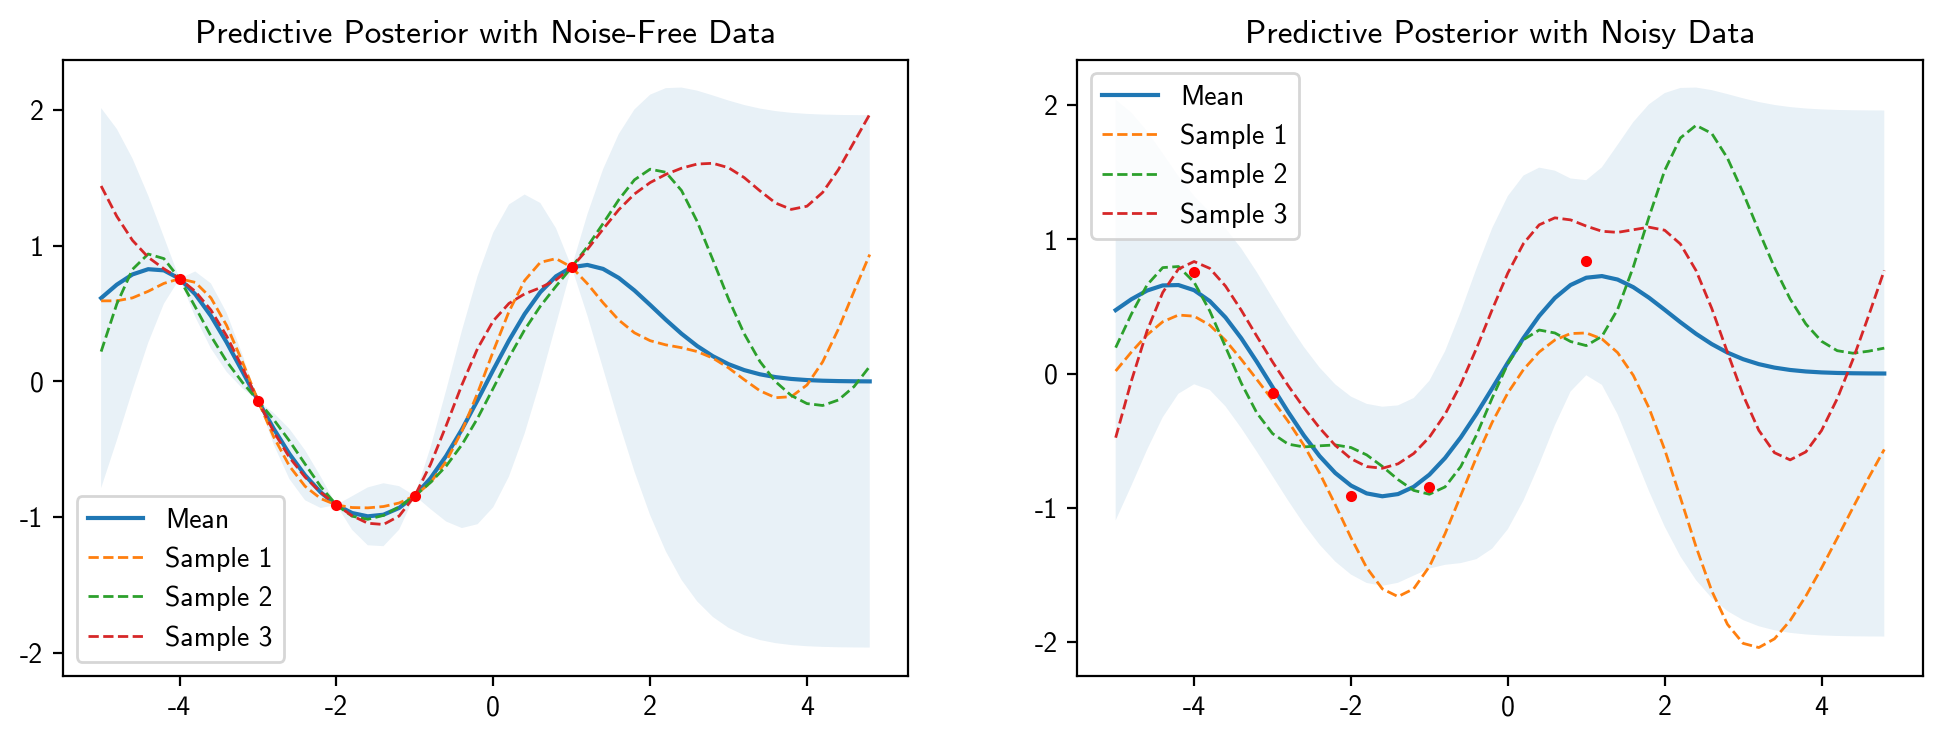

In [95]:
def posterior_predictive(X_test, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    """Return the predictive distribution for the test inputs as a multivariate normal"""
    K = kernel(X_train, X_train, l=l, sigma_f=sigma_f) + sigma_y ** 2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_test, l=l, sigma_f=sigma_f)
    K_ss = kernel(X_test, X_test, l=l, sigma_f=sigma_f)
    K_inv = np.linalg.inv(K)

    mu_s = K_s.T @ K_inv @ (Y_train)
    cov_s = K_ss - K_s.T @ K_inv @ K_s
    return mu_s, cov_s


# Noise free training data
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)

# Compute the predictive posterior and draw samples from it
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, sigma_y=1e-8)
samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, size=3)
plot_gp(X, mu_s, cov_s, samples, X_train, Y_train, title="Predictive Posterior with Noise-Free Data", ax=ax0)

mu_s, cov_s = posterior_predictive(X, X_train, Y_train, sigma_y=0.4)
samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, size=3)
plot_gp(X, mu_s, cov_s, samples, X_train, Y_train, title="Predictive Posterior with Noisy Data", ax=ax1)

### Kernel Parameters and Noise Parameters

The following example shows the effect of kernel parameters $l$ and $\sigma_f$ as well as the noise parameter $\sigma_y$. Higher $l$ values lead to smoother functions and therefore to coarser approximations of the training data. Lower $l$ values make functions more wiggly with wide confidence intervals between training data points. $\sigma_f$ controls the vertical variation of functions drawn from the GP. This can be seen by the wide confidence intervals outside the training data region in the right figure of the second row. $\sigma_y$ represents the amount of noise in the training data. Higher $\sigma_y$ values make more coarse approximations which avoids overfitting to noisy data.

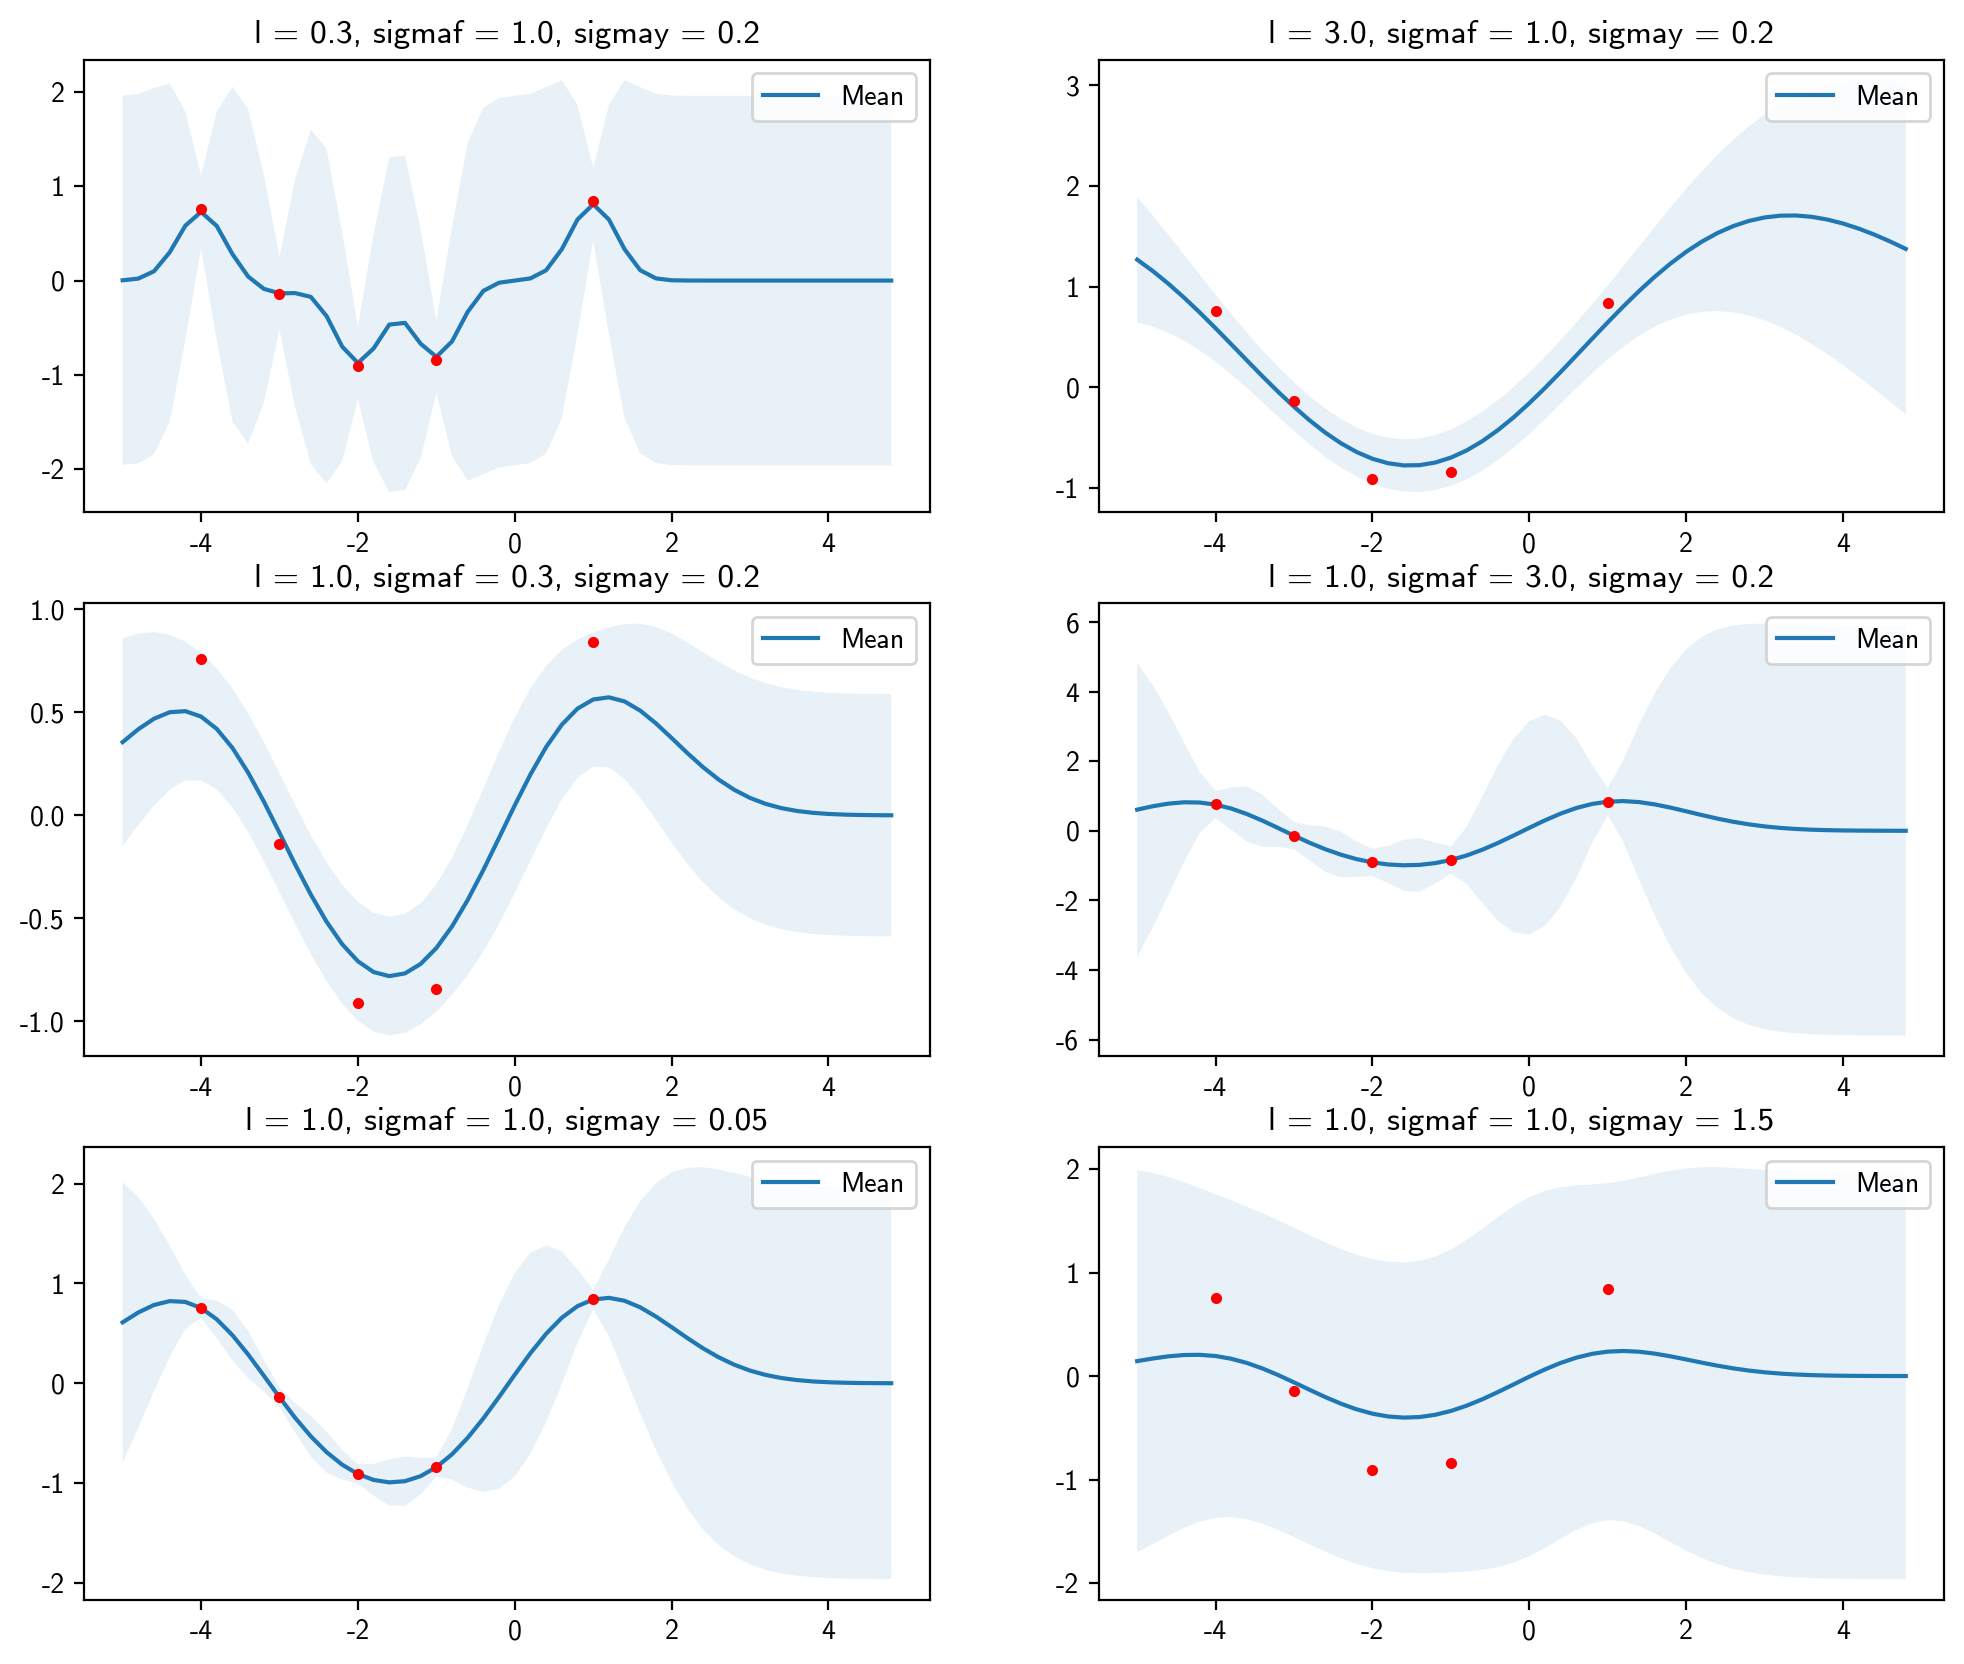

In [105]:
import matplotlib.pyplot as plt

params = [(0.3, 1.0, 0.2), (3.0, 1.0, 0.2), (1.0, 0.3, 0.2), (1.0, 3.0, 0.2), (1.0, 1.0, 0.05), (1.0, 1.0, 1.5)]
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for ax, (l, sigma_f, sigma_y) in zip(axes.flatten(), params):
    mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l, sigma_f=sigma_f, sigma_y=sigma_y)
    plot_gp(X, mu_s, cov_s, X_train=X_train, Y_train=Y_train, ax=ax, title="l = {}, sigmaf = {}, sigmay = {}".format(l, sigma_f, sigma_y))

Optimal values for these parameters can be estimated by maximizing the marginal log-likelihood which is given by

$$
\log p(\mathbf{y} \lvert \mathbf{X}) = 
\log \mathcal{N}(\mathbf{y} \lvert \boldsymbol{0},\mathbf{K}_y) =
-\frac{1}{2} \mathbf{y}^T \mathbf{K}_y^{-1} \mathbf{y} 
-\frac{1}{2} \log \begin{vmatrix}\mathbf{K}_y\end{vmatrix} 
-\frac{N}{2} \log(2\pi) \tag{7}
$$

In the following we will minimize the negative marginal log-likelihood w.r.t. parameters $l$ and $\sigma_f$, $\sigma_y$ is set to the known noise level of the data. If the noise level is unknown, $\sigma_y$ can be estimated as well along with the other parameters. 

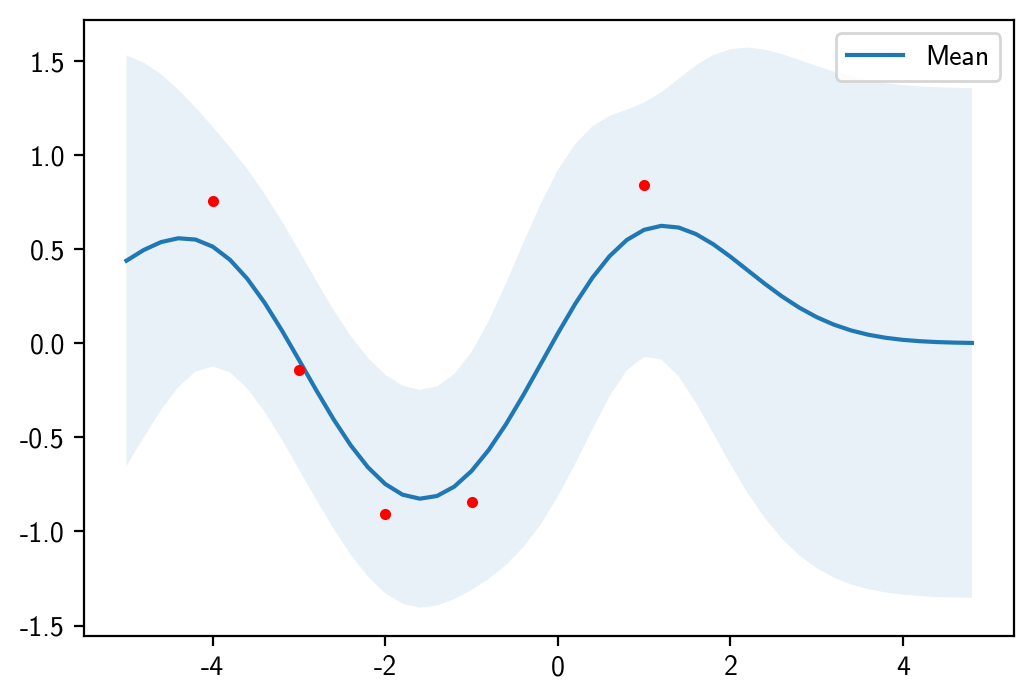

In [119]:
from numpy.linalg import cholesky, det, lstsq
from scipy.optimize import minimize


def negative_log_likelihood(X_train, Y_train, noise, naive=True):
    def nll(theta):
        L = cholesky(kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + noise ** 2 * np.eye(len(X_train)))
        return np.sum(np.log(np.diagonal(L))) + 0.5 * Y_train.T.dot(lstsq(L.T, lstsq(L, Y_train, rcond=None)[0], rcond=None)[0]) + 0.5 * len(X_train) * np.log(2 * np.pi)

    return nll


# Minimize the negative log-likelihood w.r.t. parameters l and sigma_f.
res = minimize(negative_log_likelihood(X_train, Y_train, noise=0.4), [1, 1], bounds=((1e-5, None), (1e-5, None)), method="L-BFGS-B")
l_opt, sigma_f_opt = res.x

# Compute the prosterior predictive statistics with optimized kernel parameters and plot the results
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l_opt, sigma_f=sigma_f_opt, sigma_y=0.4)
plot_gp(X, mu_s, cov_s, X_train=X_train, Y_train=Y_train)

### Scikit-learn Implementation

Scikit-learn provides a `GaussianProcessRegressor` for implementing [GP regression models](http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-regression-gpr). It can be configured with [pre-defined kernels and user-defined kernels](http://scikit-learn.org/stable/modules/gaussian_process.html#gp-kernels). Kernels can also be composed. The squared exponential kernel is the `RBF` kernel in scikit-learn. The `RBF` kernel only has a `length_scale` parameter which corresponds to the $l$ parameter above. To have a $\sigma_f$ parameter as well, we have to compose the `RBF` kernel with a `ConstantKernel`.

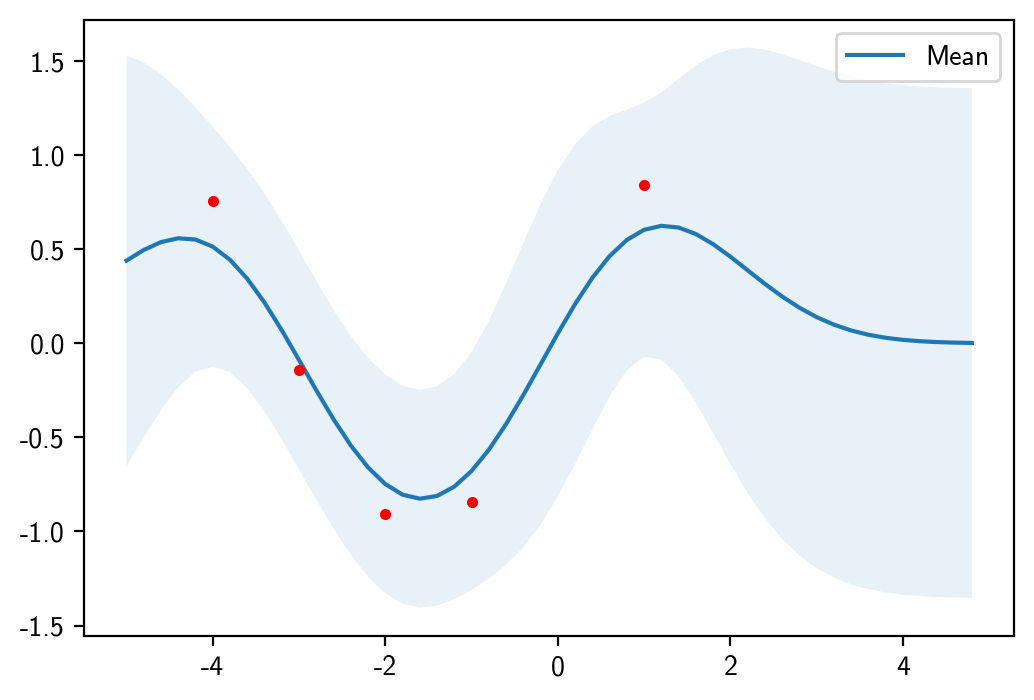

In [125]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=rbf, alpha=0.4 ** 2)

# Reuse training data from previous 1D example
gpr.fit(X_train, Y_train)

# Compute posterior predictive mean and covariance
mu_s, cov_s = gpr.predict(X, return_cov=True)

# Obtain optimized kernel parameters
l = gpr.kernel_.k2.get_params()["length_scale"]
sigma_f = np.sqrt(gpr.kernel_.k1.get_params()["constant_value"])

# Compare with previous results
assert np.isclose(l_opt, l)
assert np.isclose(sigma_f_opt, sigma_f)

# Plot the results
plot_gp(X, mu_s, cov_s, X_train=X_train, Y_train=Y_train)

### Gaussian Process Regression

We first focus on the binary classification model $p(y = 1 \mid \mathbf{x}) = \sigma(f(\mathbf{x}))$ where a GP prior is placed on the latent function $f(\mathbf{x})$ and $\sigma(\cdot)$ is a sigmoid function, e.g. logistic function or cumulative Gaussian. Similar to Gaussian process regression, the distribution of the latent variable $f_*$ corresponding to a test case $\mathbf{x}_*$ can be derived via the posterior distribution over the latent variables $p(\mathbf{f} \mid \mathbf{X}, \mathbf{y})$:
$$p(f_* \mid \mathbf{X}, \mathbf{y}, \mathbf{x}_*) = \int p(f_* \mid \mathbf{X}, \mathbf{x}_*, \mathbf{f}) \, p(\mathbf{f} \mid \mathbf{X}, \mathbf{y}) \, d\mathbf{f} = \int p(f_* \mid \mathbf{X}, \mathbf{x}_*, \mathbf{f}) \, \left(\frac{p(\mathbf{y} \mid \mathbf{X}, \mathbf{f}) \, p(\mathbf{f} \mid \mathbf{X})}{p(\mathbf{y} \mid \mathbf{X})} \right) \, d\mathbf{f}.$$
The main difficulty here is that the Gaussian prior $p(\mathbf{f} \mid \mathbf{X})$ is not conjugate to the Bernoulli likelihood $p(\mathbf{y} \mid \mathbf{X}, \mathbf{f})$, so we do not have an analytical form of the posterior distribution $p(\mathbf{f} \mid \mathbf{X}, \mathbf{y})$. In this case, there are several useful approximations, including Laplace approximation and expectation propagation.

Laplace's method approximates the posterior $p(\mathbf{f} \mid \mathbf{X}, \mathbf{y})$ by a Gaussian distribution $q(\mathbf{f} \mid \mathbf{X}, \mathbf{y}) = \mathcal{N}(\mathbf{f}; \hat{\mathbf{f}}, \mathbf{A}^{-1})$ where $\hat{\mathbf{f}} = \text{argmax}_{\mathbf{f}} \, p(\mathbf{f} \mid \mathbf{X}, \mathbf{y})$ is the mode of the posterior distribution and $\mathbf{A} = -\nabla \nabla \log p(\mathbf{f} \mid \mathbf{X}, \mathbf{y})$ is chosen to match the second-order term in the Taylor expansion of the log posterior at $\hat{\mathbf{f}}$. More specifically, since the marginal likelihood $p(\mathbf{y} \mid \mathbf{X})$ is independent of $\mathbf{f}$, we can find $\hat{\mathbf{f}}$ by maximizing the logarithm of the unnormalized posterior:
$$\Psi(\mathbf{f}) \triangleq \log p(\mathbf{y} \mid \mathbf{f}, \mathbf{X}) + \log p(\mathbf{f} \mid \mathbf{X}) = \log p(\mathbf{y} \mid \mathbf{f}, \mathbf{X}) - \frac{1}{2}\mathbf{f}^{\mathsf{T}} \mathbf{K}^{-1}\mathbf{f} - \frac{1}{2}\log |\mathbf{K}| - \frac{N}{2} \log(2\pi).$$
The gradient and Hessian of $\Psi(\mathbf{f})$ depends on the gradient and Hessian of log likelihood $\log p(\mathbf{y} \mid \mathbf{f}, \mathbf{X})$, respectively:
$$\nabla \Psi(\mathbf{f}) = \nabla \log p(\mathbf{y} \mid \mathbf{f}, \mathbf{X}) - \mathbf{K}^{-1}\mathbf{f}, \quad \nabla \nabla \Psi(\mathbf{f}) = \nabla \nabla \log p(\mathbf{y} \mid \mathbf{f}, \mathbf{X}) - \mathbf{K}^{-1} = -\mathbf{W} - \mathbf{K}^{-1}.$$
Solving for $\hat{\mathbf{f}}$ requires some iterative procedure, and Newton's method arises naturally (note that since $\mathbf{W} \triangleq - \nabla \nabla \log p(\mathbf{y} \mid \mathbf{f}, \mathbf{X})$ is a diagonal matrix due to the i.i.d. assumption about data):
$$\mathbf{f}^{\text{new}} = \mathbf{f} - (\nabla \nabla \Psi)^{-1} (\nabla \Psi) = (\mathbf{K}^{-1} + \mathbf{W})^{-1} (\mathbf{W} \mathbf{f} +  \nabla \log p(\mathbf{y} \mid \mathbf{f}, \mathbf{X})).$$
At convergence, the Gaussian approximation of the posterior takes the form $q(\mathbf{f} \mid \mathbf{X}, \mathbf{y}) = \mathcal{N}(\mathbf{f}; \hat{\mathbf{f}}, (\mathbf{K}^{-1} + \mathbf{W})^{-1})$, which results in a Gaussian distribution for the latent variable $f_*$:
$$q(f_* \mid \mathbf{X}, \mathbf{y}, \mathbf{x}_*) = \int p(f_* \mid \mathbf{X}, \mathbf{x}_*, \mathbf{f}) \, q(\mathbf{f} \mid \mathbf{X}, \mathbf{y}) \, d\mathbf{f} = \mathcal{N}(\mathbf{k}_*^{\mathsf{T}} \mathbf{K}^{-1} \hat{\mathbf{f}}, \, k_{**} - \mathbf{k}_*^{\mathsf{T}} (\mathbf{K} + \mathbf{W}^{-1})^{-1} \mathbf{k}_*).$$
The predictive distribution is $f_*$, i.e. $\pi_* = p(y_* = 1 \mid \mathbf{X}, \mathbf{y}, \mathbf{x}_*) \approx \int \sigma(f_*) \, q(f_* \mid \mathbf{X}, \mathbf{y}, \mathbf{x}_*) \, df_*  = \mathbb{E}_q \left[\sigma(f_*) \right]$, which is generally different from $\sigma(\mathbb{E}_q[f_* \mid \mathbf{y}])$. The predictive distribution also requires performing an intractable integration, but we can easily approximate it by $\pi_* = \sigma(\kappa(f_* \mid \mathbf{y}) \, \mathbb{E}_q[\mathbf{f}_*])$ where $\kappa^2(v) = (1 + \pi v/8)^{-1}$.

For multi-class classification, we consider a model of the form $p(y \mid \mathbf{x}) = \text{Categorical}(y; \, \text{softmax}(f(\mathbf{x})))$ where $f(\mathbf{x}) = (f_{1}, \dots, f_{C})$ is a $C$-dimensional latent vector. We assume $f_c \sim \text{GP}(0, \kappa_c)$, i.e. each class has a latent function with its own kernel, and these $C$ latent functions are a priori independent. As in the case of binary classification, we approximate the posterior distribution $p(\mathbf{f} \mid \mathbf{X}, \mathbf{y})$ with a Gaussian $q(\mathbf{f} \mid \mathbf{X}, \mathbf{y})$ where the covariance matrix of the latent function values $\mathbf{f} \in \mathbb{R}^{NC}$ has a block structure.

In [1]:
from IPython.core.display import HTML
HTML(open('../css/custom.css', 'r').read())